<a href="https://colab.research.google.com/github/Rashi-maru/Appointy/blob/master/PD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###Import Libraries

In [ ]:
!pip install keras.applications  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
from keras_applications.resnet import ResNet50  

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.image as mpimg 
from keras.preprocessing import image
from keras import models
import matplotlib.pyplot as plt
import math

In [ ]:
import keras

In [ ]:
### Define constants

In [ ]:
train_dir = "/kaggle/input/parkinson-dataset/spiral/training/"
test_dir  = "/kaggle/input/parkinson-dataset/spiral/testing/"

IMG_WIDTH, IMG_HEIGHT = (300, 300)
EPOCHS = 50
BATCH_SIZE= 16
CLASSES_NO = 2
print("EPOCHS = {}".format(EPOCHS))
print("BATCH_SIZE = {}".format(BATCH_SIZE))
print("CLASSES_NO = {}".format(CLASSES_NO))

EPOCHS = 50
BATCH_SIZE = 16
CLASSES_NO = 2


In [ ]:
### Load Dataset

In [ ]:
from zipfile import ZipFile
file_name = "/content/spiral.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
train_dir = "/content/spiral/training"
test_dir  = "/content/spiral/testing"


train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
)

Found 77 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
###Exploring Augmented Dataset

[0. 1.]


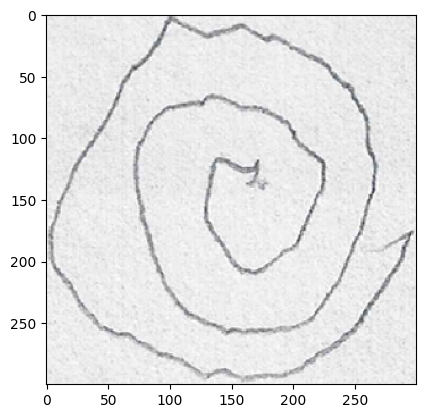

[0. 1.]


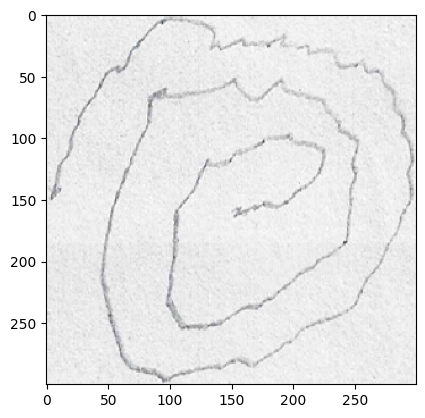

[0. 1.]


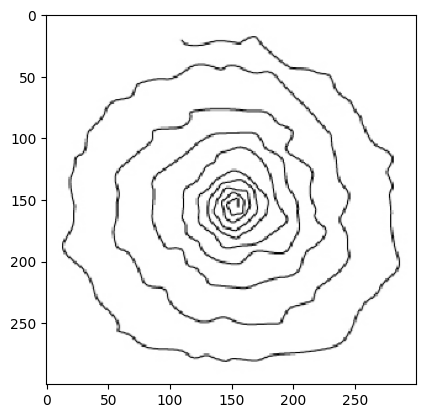

[0. 1.]


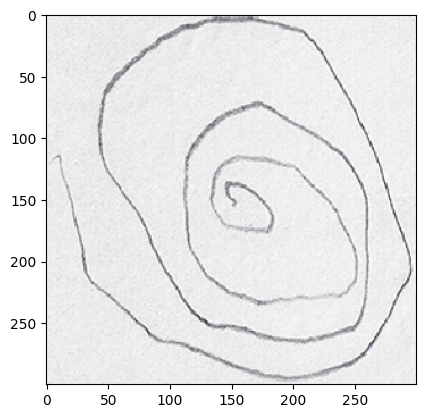

[0. 1.]


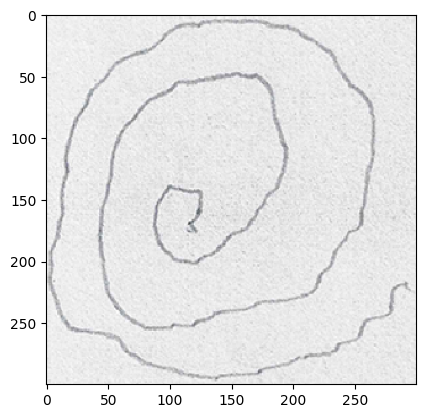

[0. 1.]


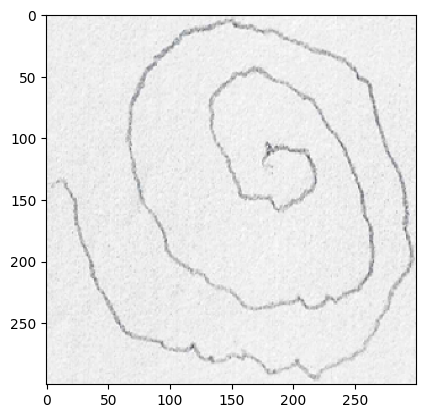

[0. 1.]


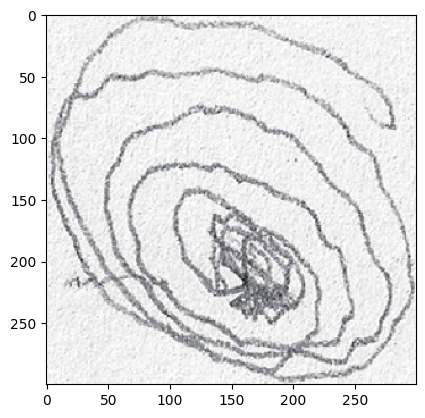

[0. 1.]


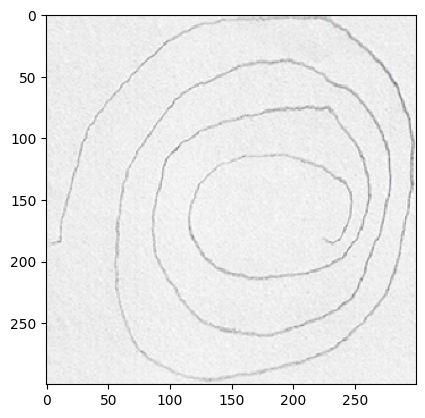

[1. 0.]


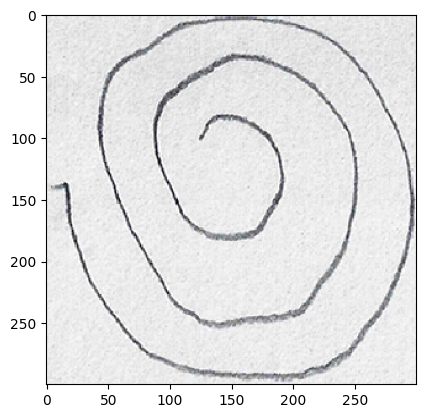

[1. 0.]


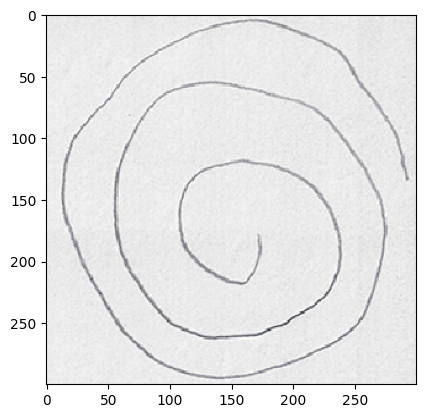

In [ ]:
counter = 0
for input_batch, label in train:
    print(label[0])
    plt.imshow(input_batch[0])
    plt.show()
    counter += 1
    if counter == 10:
        break

In [ ]:
###Creating model

In [ ]:
def build_model(reg=False):
    
    regularizers = keras.regularizers.l2(1e-3)
    
    model = keras.Sequential()

    model.add(keras.layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)))

    model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D(2, 2))

    model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D(2, 2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(2, activation="softmax"))

    model.summary()
    
    return model


model = build_model(reg=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
### Compile model

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['acc']
)

In [ ]:
### Train model

In [ ]:
history = model.fit(
    train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=test
)

Epoch 1/50
5/5 [==============================] - 26s 5s/step - loss: 0.9916 - acc: 0.4416 - val_loss: 0.9198 - val_acc: 0.5000
Epoch 2/50
5/5 [==============================] - 23s 5s/step - loss: 0.9035 - acc: 0.5065 - val_loss: 0.8925 - val_acc: 0.5000
Epoch 3/50
5/5 [==============================] - 23s 5s/step - loss: 0.8769 - acc: 0.5325 - val_loss: 0.8634 - val_acc: 0.5000
Epoch 4/50
5/5 [==============================] - 23s 4s/step - loss: 0.8466 - acc: 0.5195 - val_loss: 0.8410 - val_acc: 0.5000
Epoch 5/50
5/5 [==============================] - 24s 5s/step - loss: 0.8217 - acc: 0.4935 - val_loss: 0.8192 - val_acc: 0.5000
Epoch 6/50
5/5 [==============================] - 22s 4s/step - loss: 0.8025 - acc: 0.5455 - val_loss: 0.8019 - val_acc: 0.5000
Epoch 7/50
5/5 [==============================] - 22s 5s/step - loss: 0.8076 - acc: 0.5195 - val_loss: 0.7897 - val_acc: 0.5000
Epoch 8/50
5/5 [==============================] - 24s 5s/step - loss: 0.7670 - acc: 0.5325 - val_loss: 0

In [ ]:
## Plot metrics
## As we can see, model has overfitted over training data

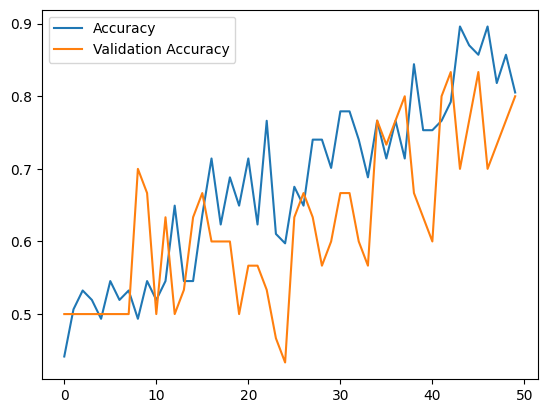

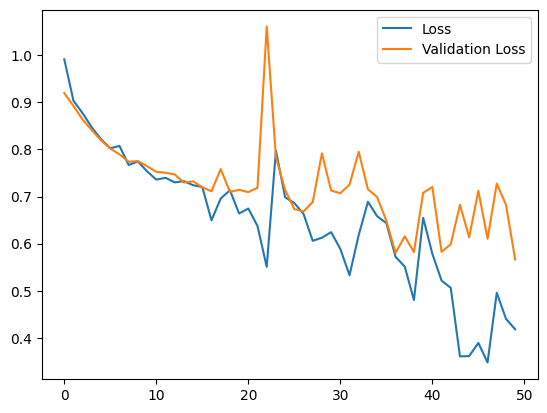

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
### Vizualization

In [ ]:
def load_sample(path):
    
    img_path =  path
    
    img = image.load_img(img_path, target_size=(300, 300))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    print(img_tensor.shape)
    
    plt.imshow(img_tensor[0])
    plt.show()
    
    return img_tensor

In [ ]:
def get_grid_by_layers_activation(activation):
    '''
    activation.shape = (1, 298, 298, 32)

    '''
    image_per_row = 16
    n_features = activation.shape[-1]
    size = activation.shape[1]
    n_cols = n_features // image_per_row
    
    display_grid = np.zeros((size * n_cols, image_per_row * size))
    
    for col in range(n_cols):
        for row in range(image_per_row):
            channel_image = activation[0, :, :, col * image_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            
            channel_image *= 64
            channel_image += 128

            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[
                col * size : (col + 1) * size,
                row * size : (row + 1) * size
            ] = channel_image
    
    scale = 2./ size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0],
                       ))
    
    plt.grid(False)
    plt.imshow(display_grid, aspect="auto", cmap='viridis')
    plt.show()

In [ ]:
def plot_channel(path, channel):
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    
    activations = activation_model.predict(
        load_sample(path)
    )
    
    for i in channel:
        get_grid_by_layers_activation(activations[i])

In [ ]:
import keras.utils as image

(1, 300, 300, 3)


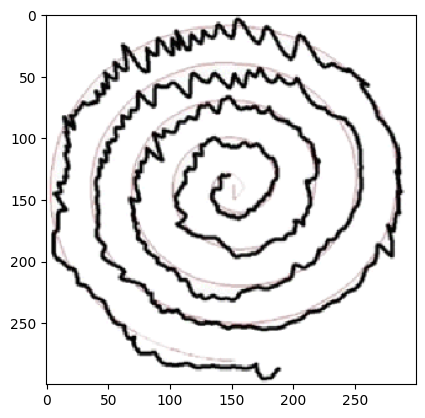

1/1 [==============================] - 0s 238ms/step


<ipython-input-23-477063ce8cac>:17: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


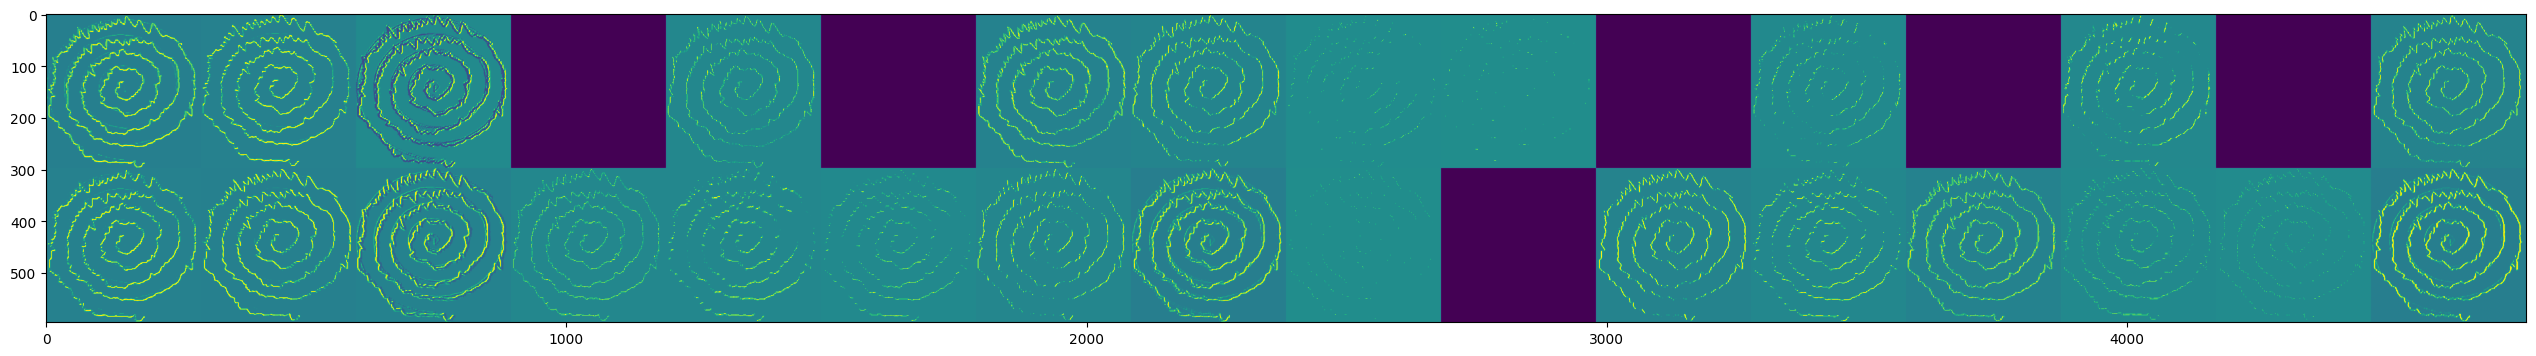

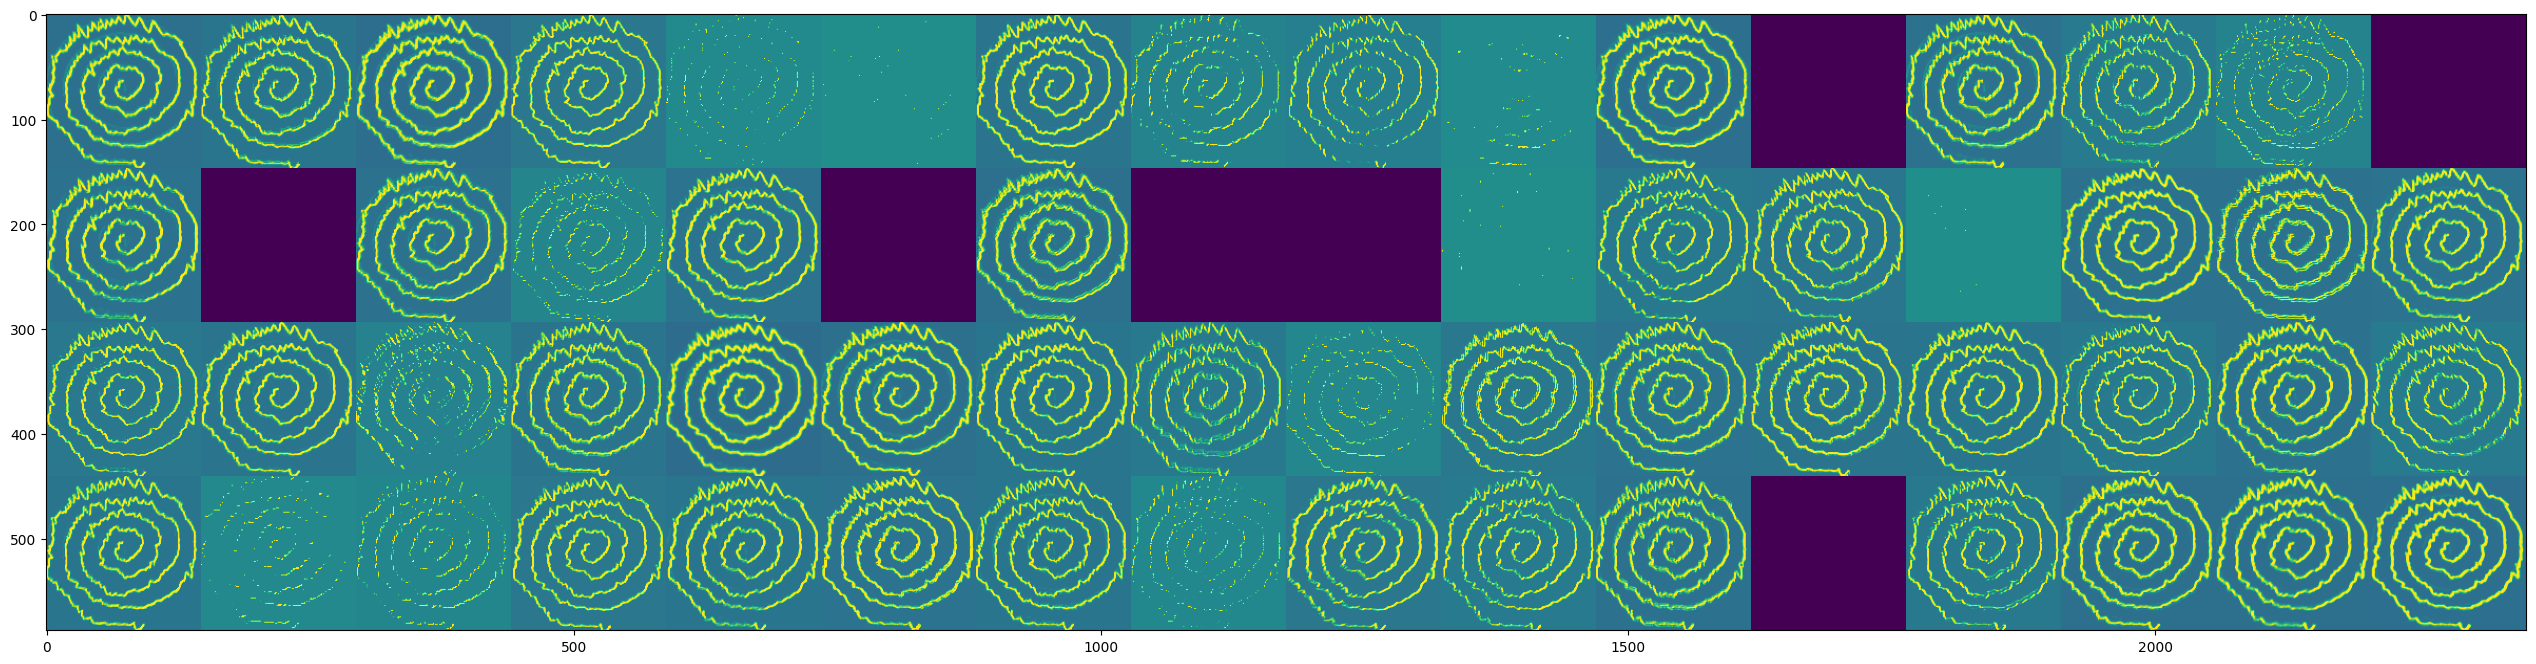

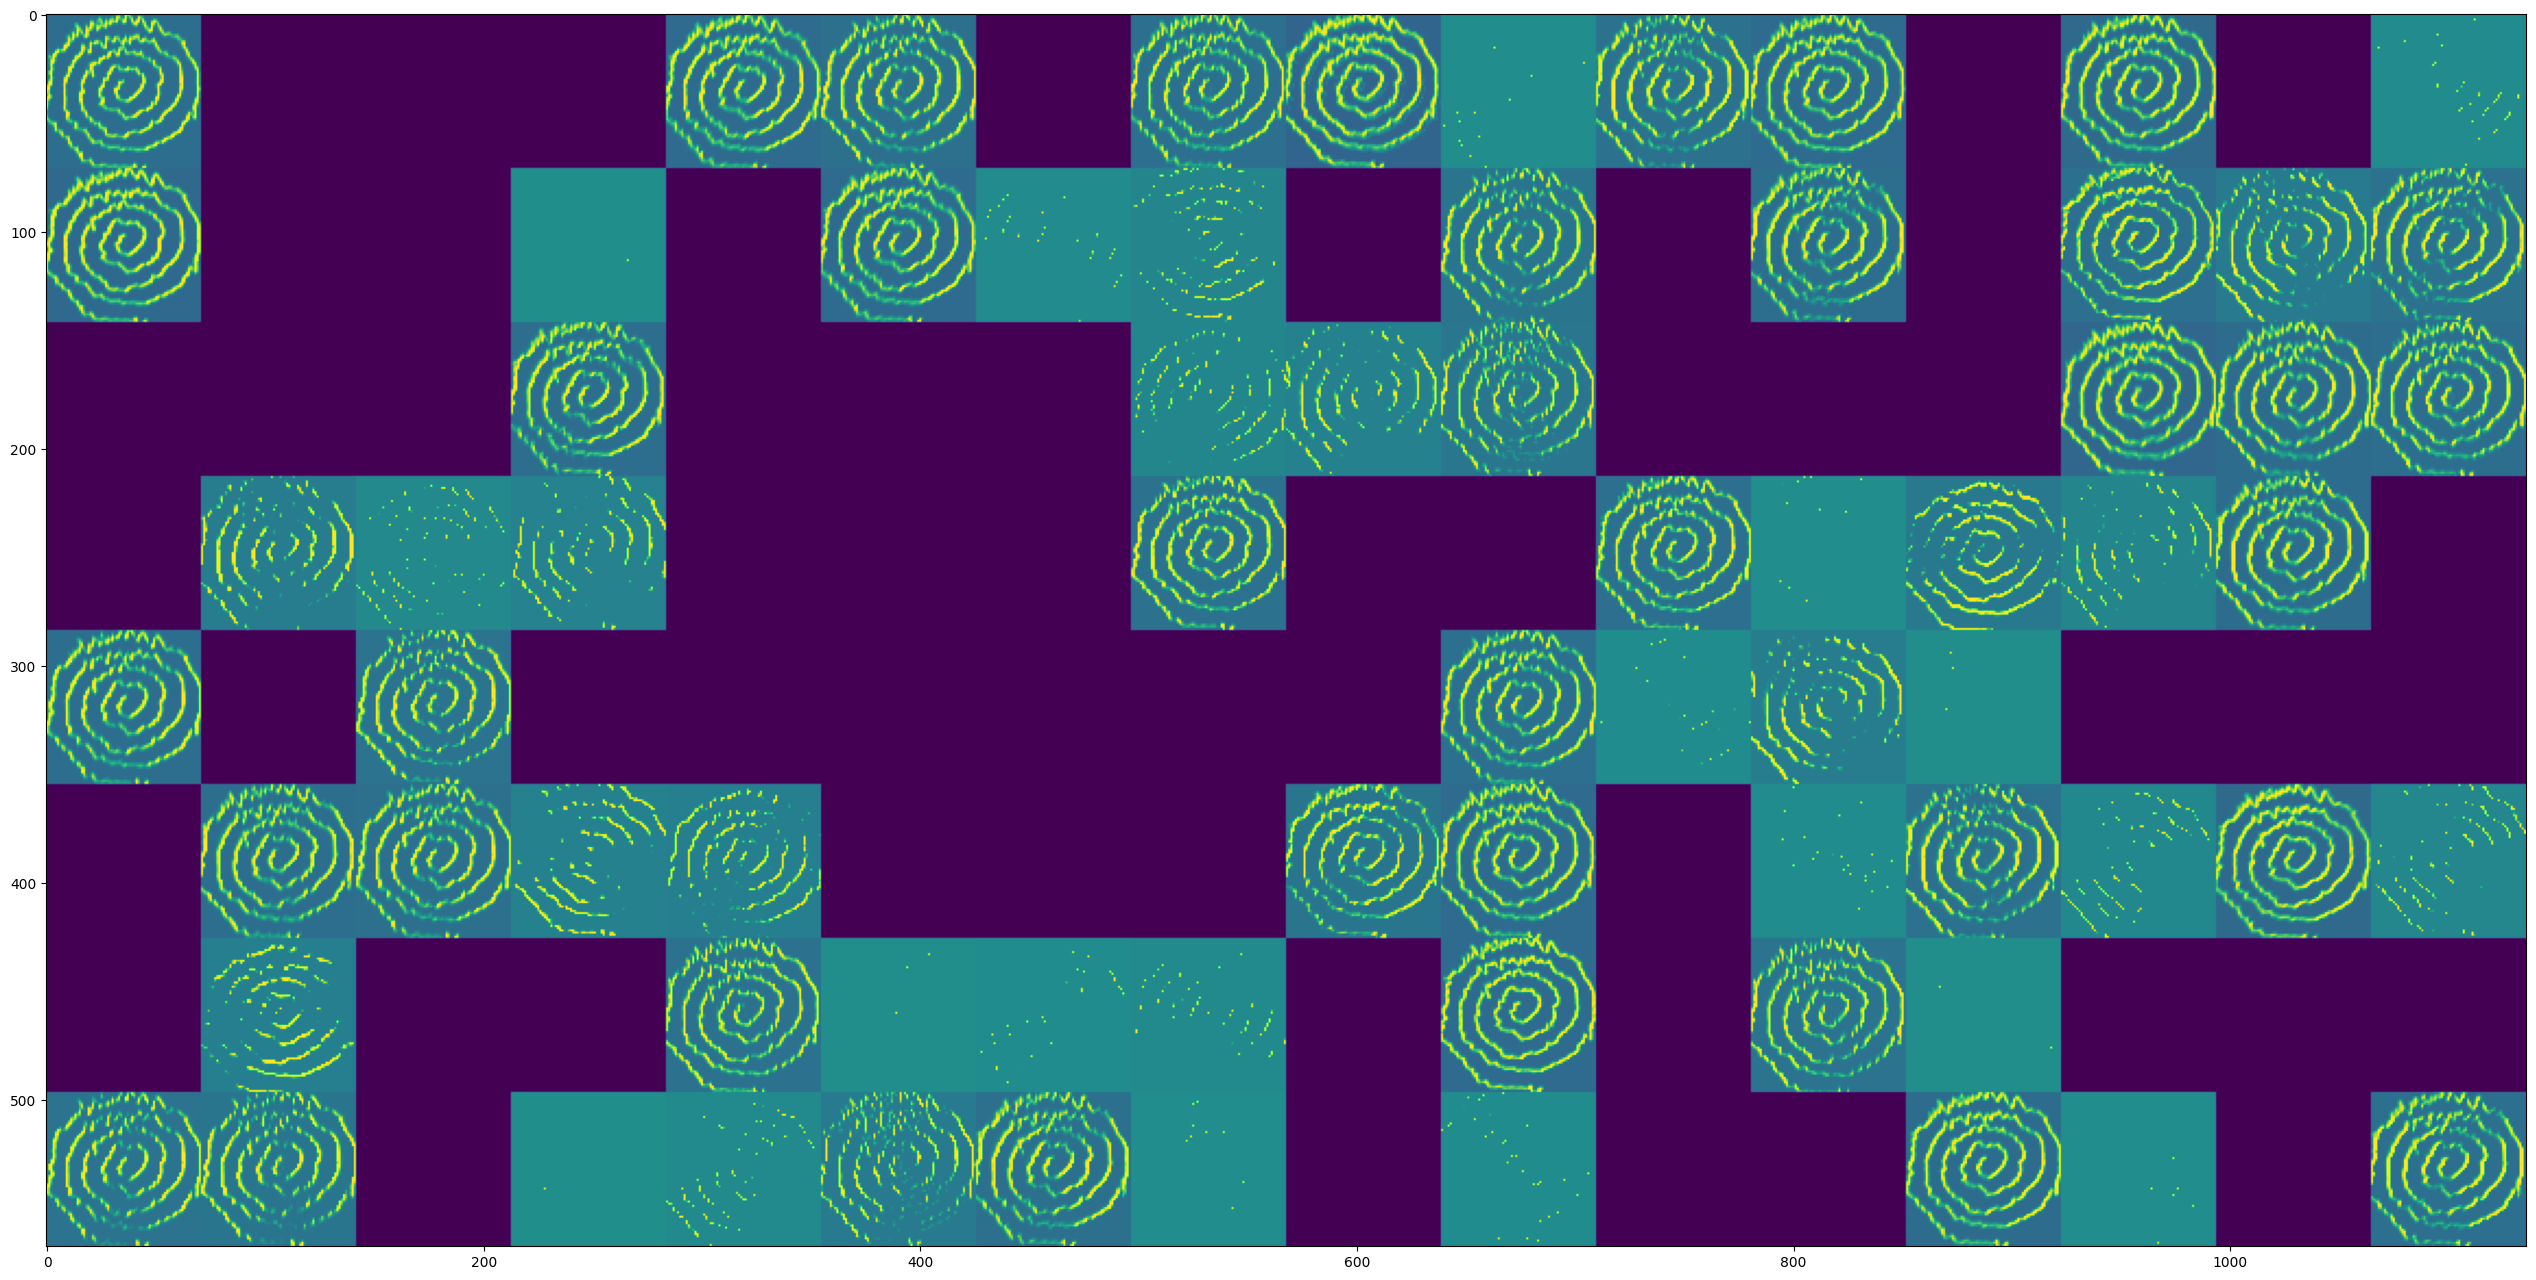

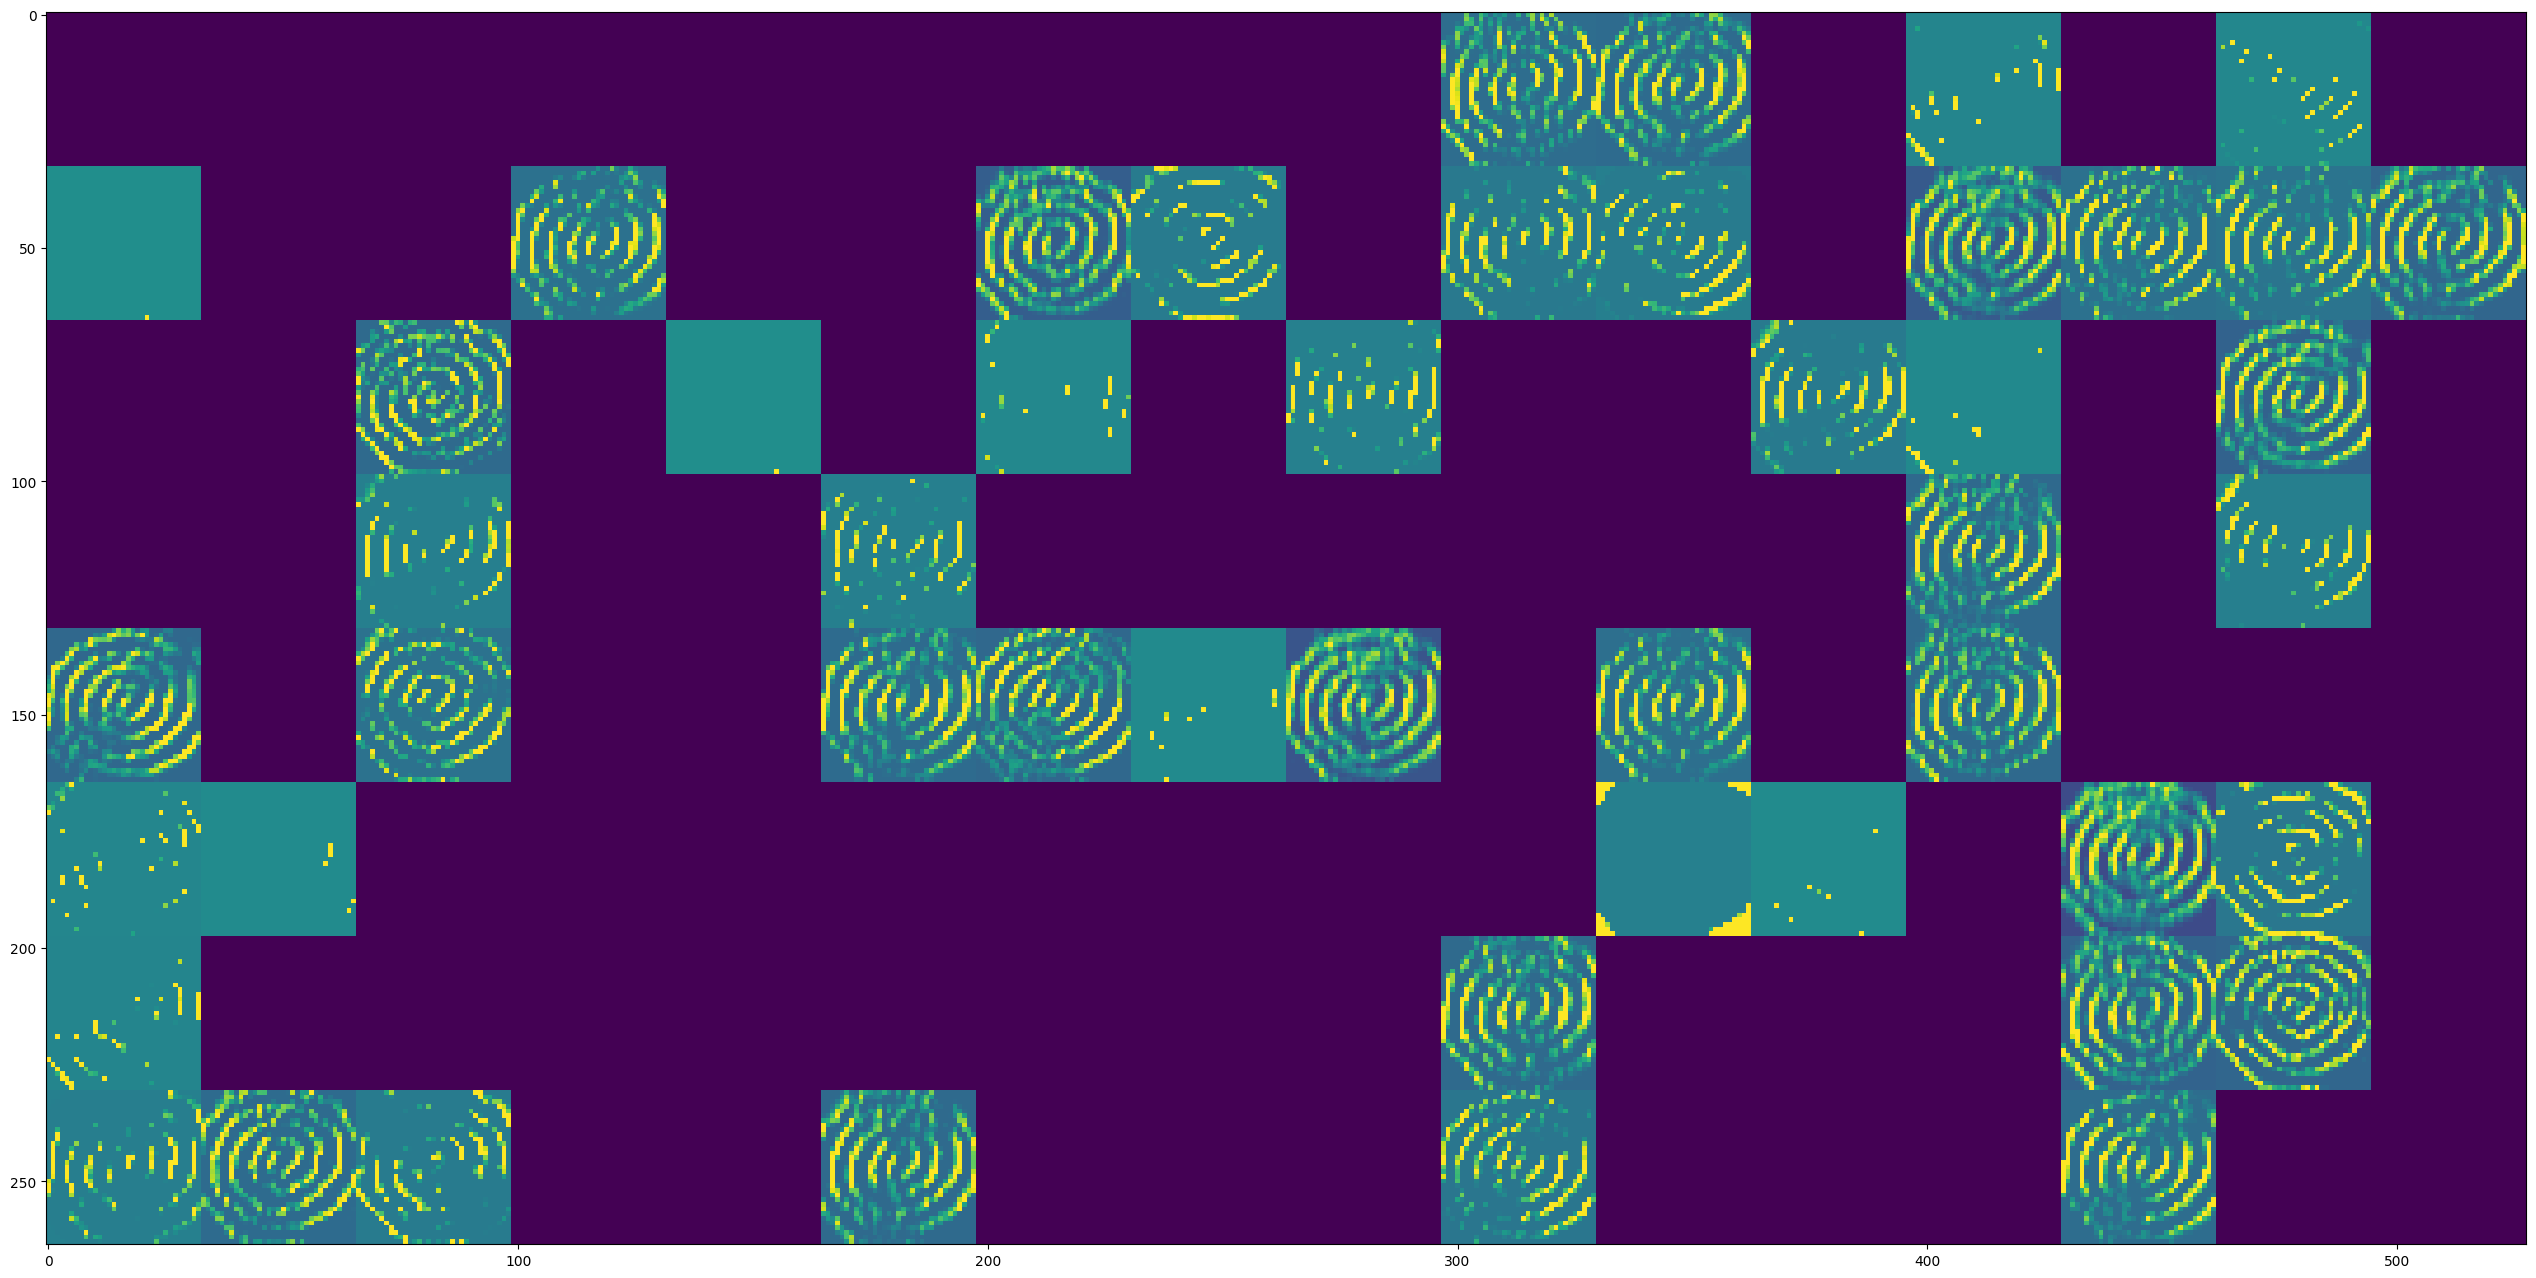

In [ ]:
plot_channel(
    "/content/spiral/training/parkinson/12883_2018_1027_Fig1_HTML.png",
    [0, 2, 4, 6]
)

(1, 300, 300, 3)


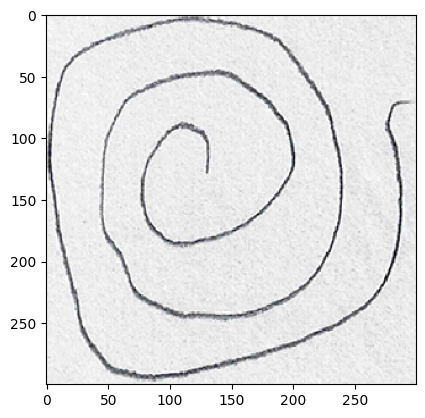

1/1 [==============================] - 0s 256ms/step


<ipython-input-23-477063ce8cac>:17: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


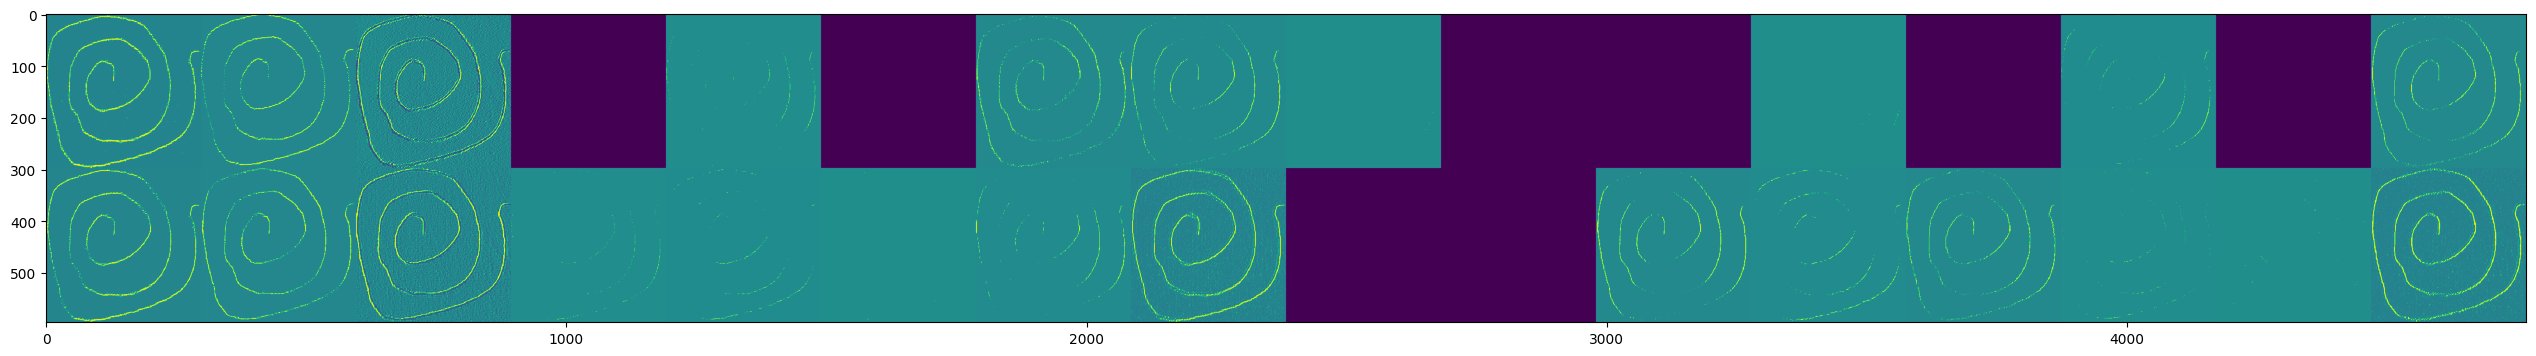

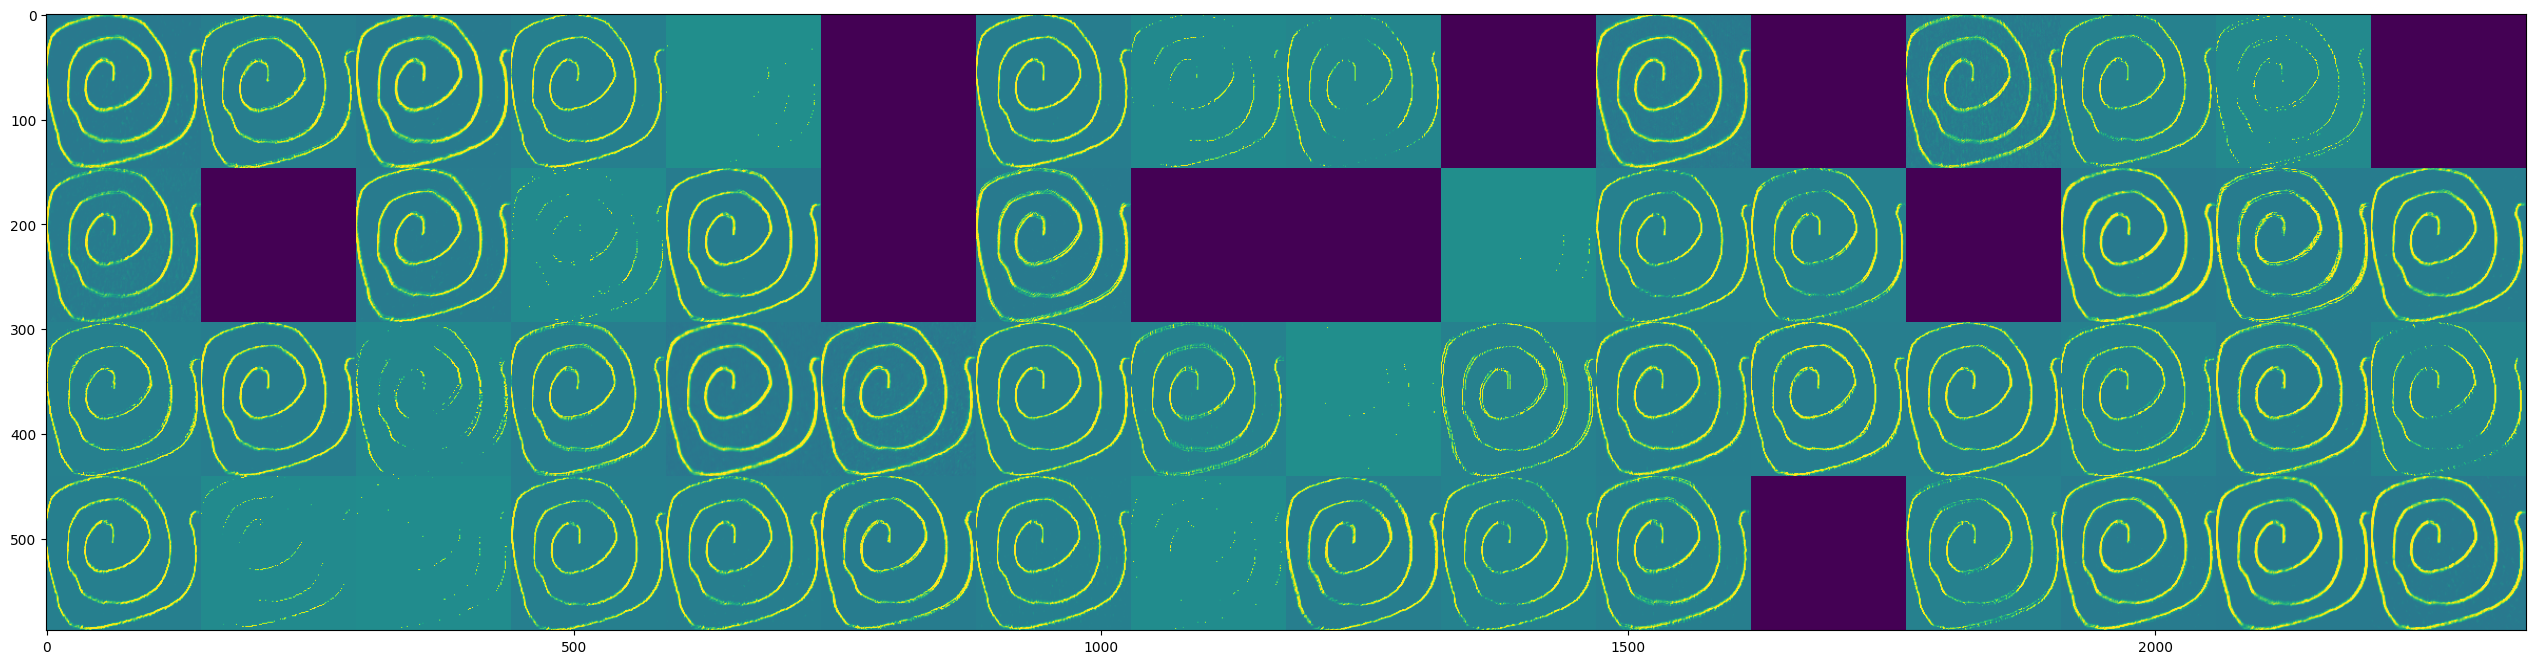

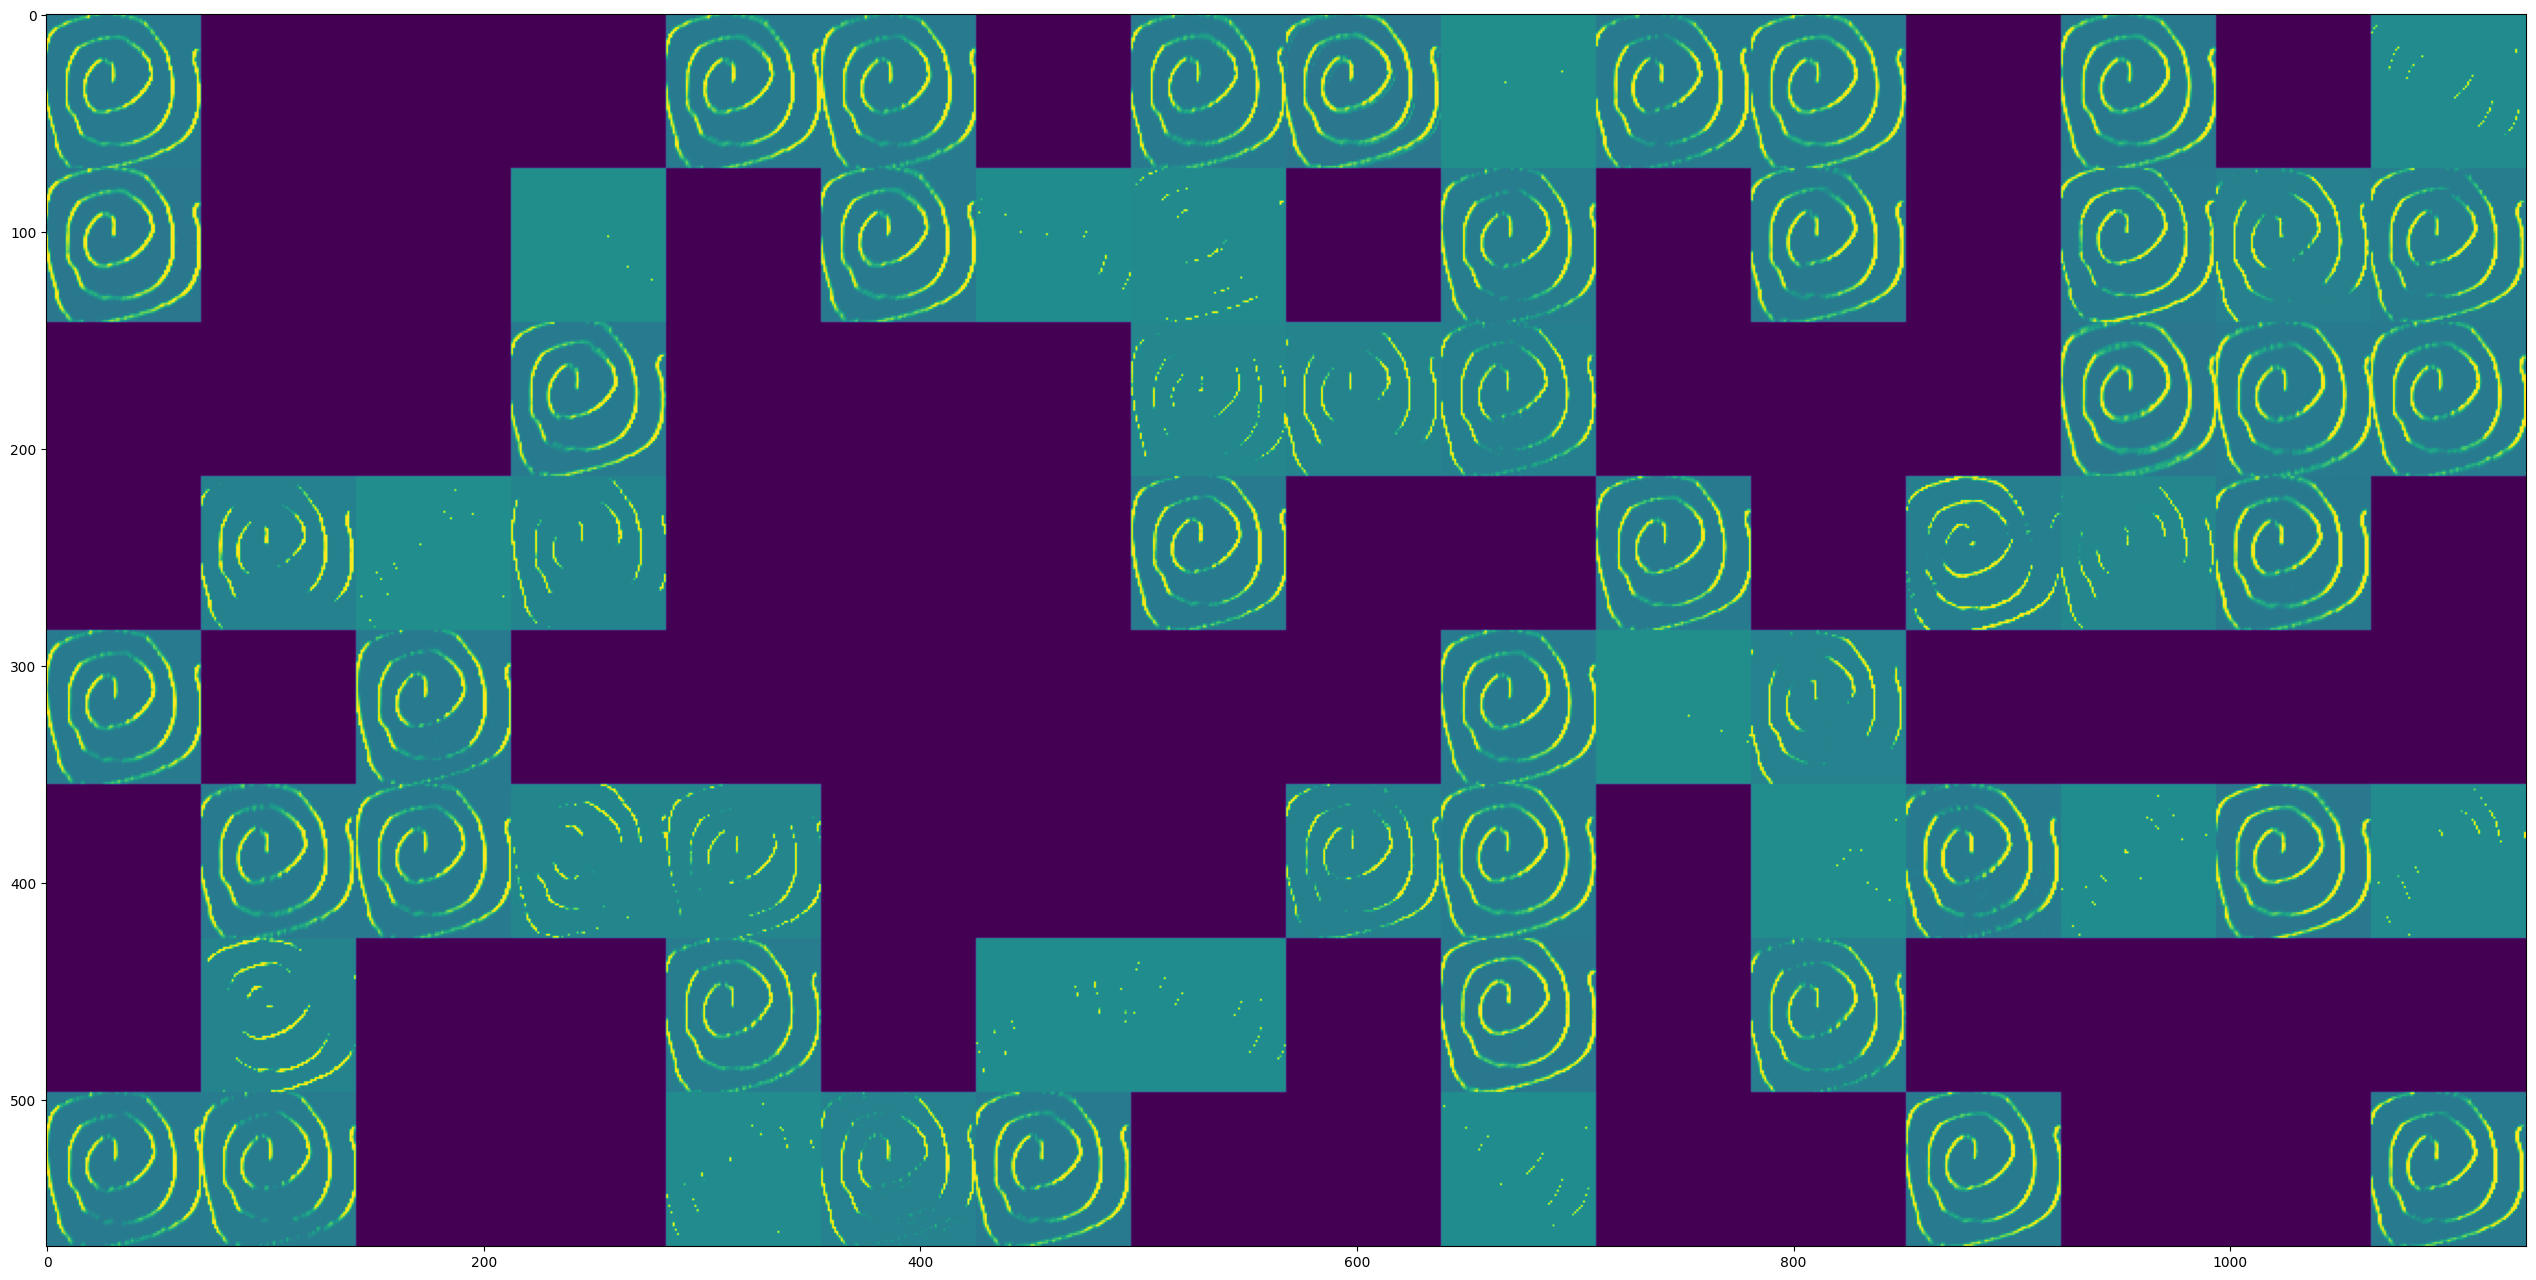

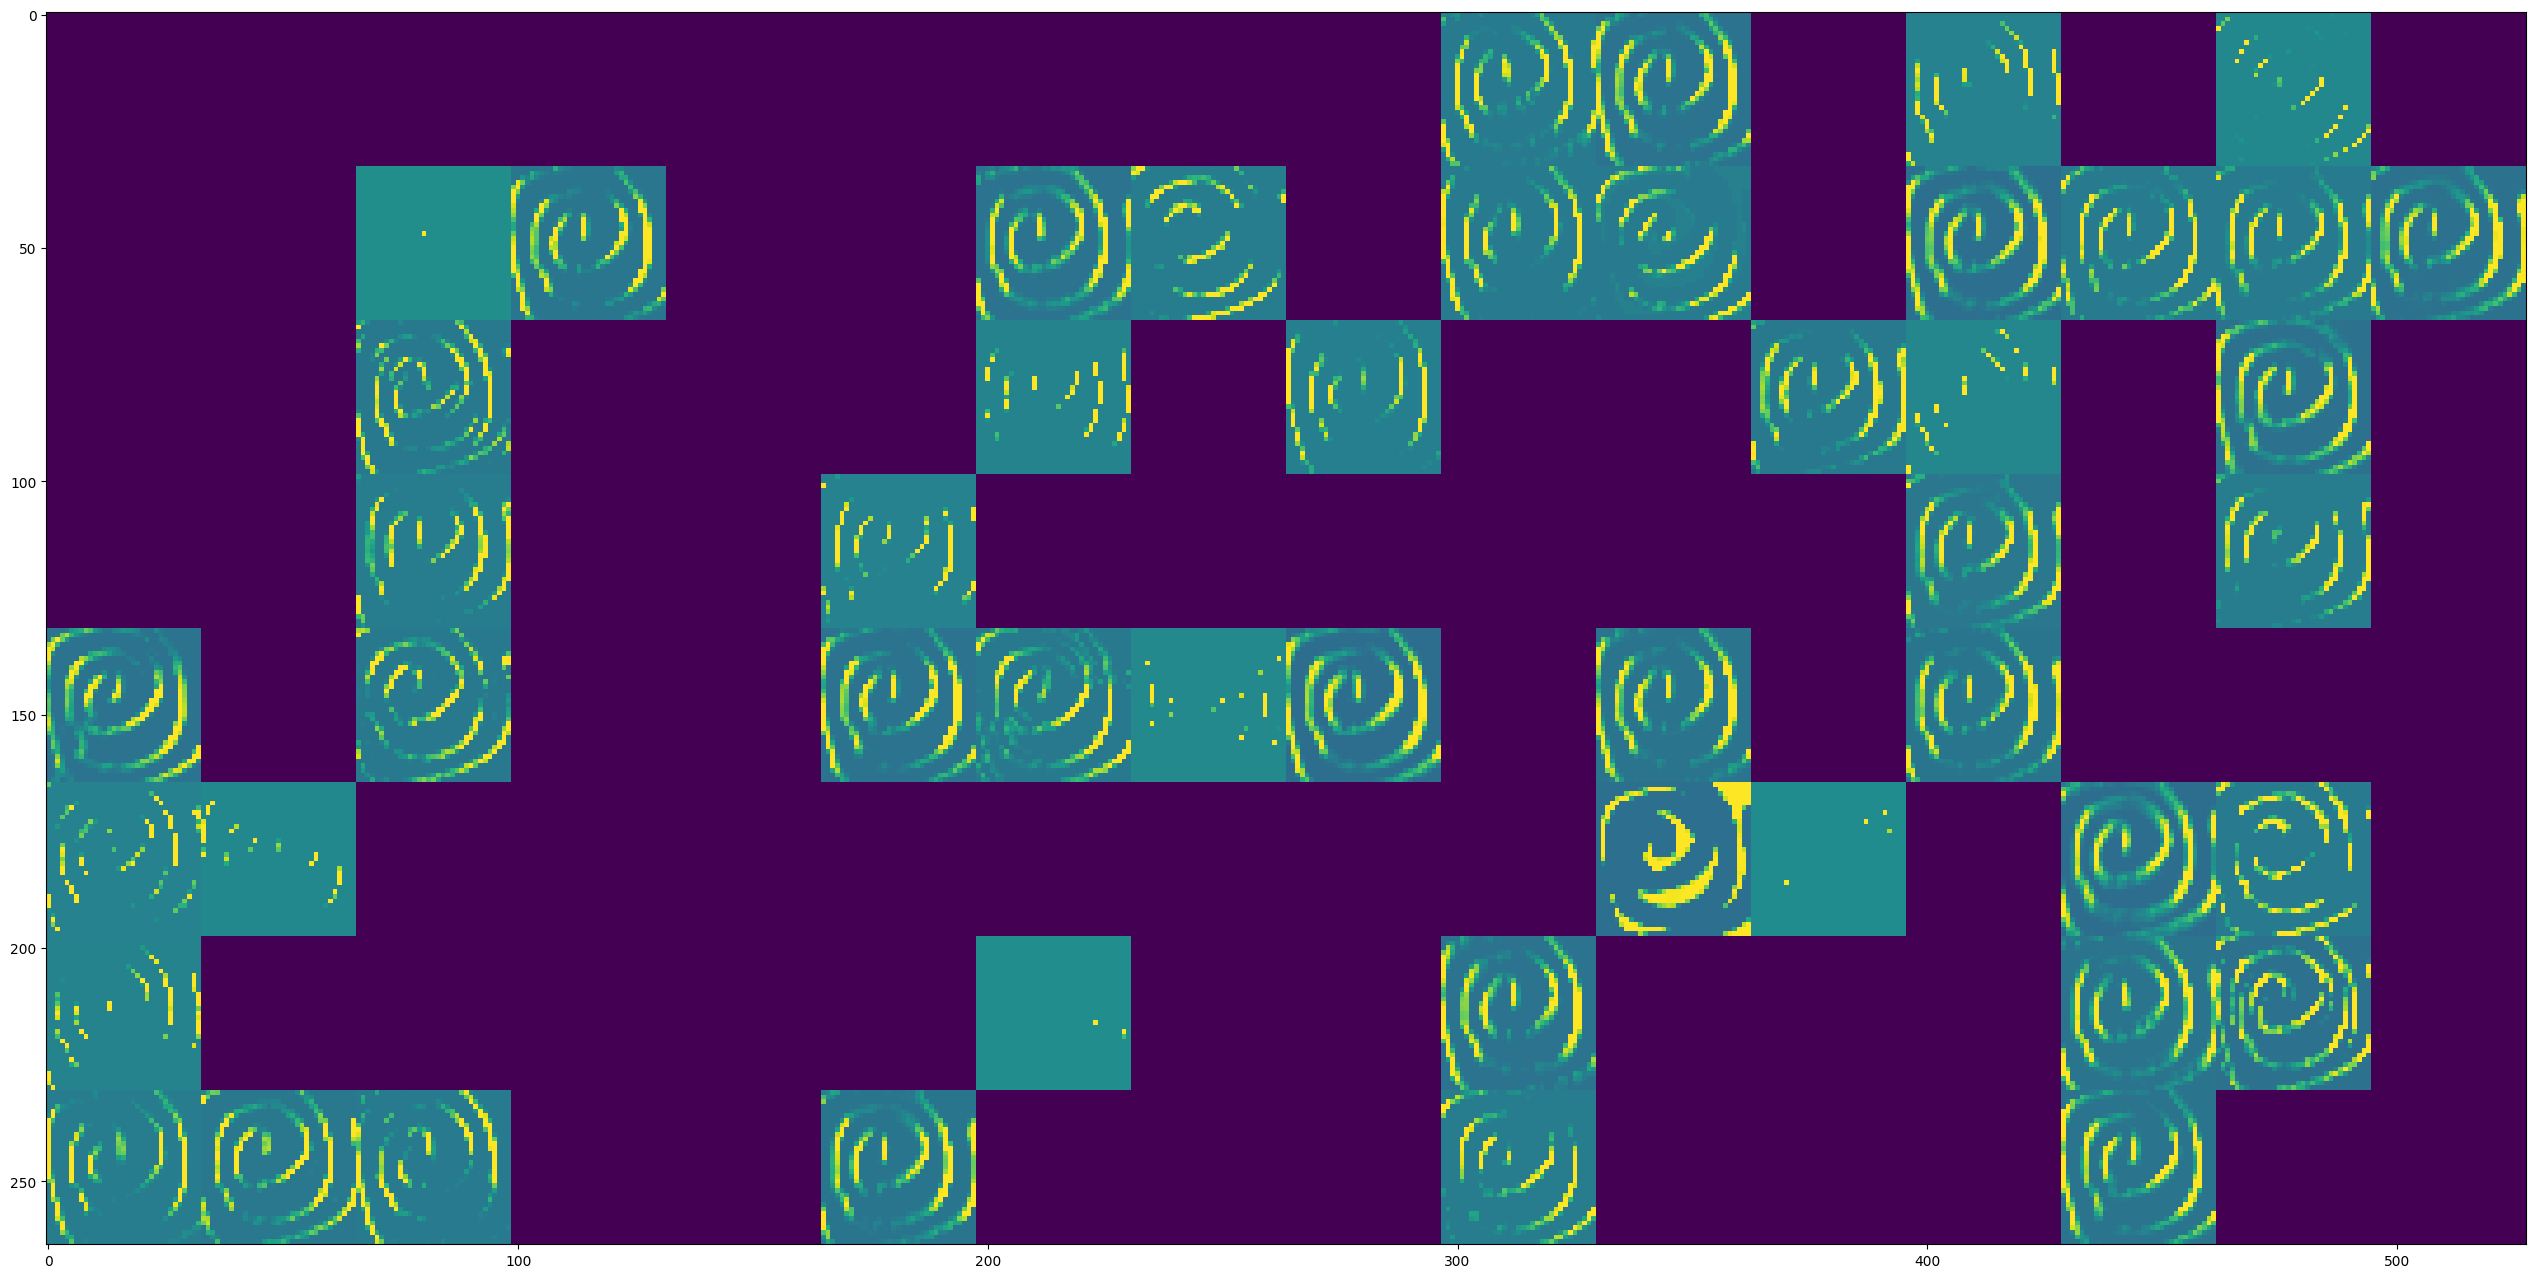

In [ ]:
plot_channel(
    "/content/spiral/training/healthy/V01HE02.png",
    [0, 2, 4, 6]
)

In [ ]:
from keras.applications import VGG16

In [ ]:
### Pretrained ConvNet

In [ ]:
conv_base = VGG16(
    include_top=False,
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    weights='imagenet'
)

conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                              

In [ ]:
### Creating new model

In [ ]:
new_model = keras.Sequential()
new_model.add(conv_base)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(128, activation="relu"))
new_model.add(keras.layers.Dense(2, activation='softmax'))

conv_base.trainable = False

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               5308544   
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 20,023,490
Trainable params: 5,308,802
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
new_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc']
)



In [ ]:
new_hist = new_model.fit(
    train,
    epochs=20,
    batch_size=BATCH_SIZE,
    validation_data=test
)

Epoch 1/20
5/5 [==============================] - 129s 28s/step - loss: 6.3979 - acc: 0.4805 - val_loss: 5.6122 - val_acc: 0.5000
Epoch 2/20
5/5 [==============================] - 125s 27s/step - loss: 1.8626 - acc: 0.7662 - val_loss: 1.3716 - val_acc: 0.6000
Epoch 3/20
5/5 [==============================] - 124s 27s/step - loss: 0.6025 - acc: 0.8182 - val_loss: 2.8742 - val_acc: 0.5000
Epoch 4/20
5/5 [==============================] - 125s 27s/step - loss: 0.9579 - acc: 0.7662 - val_loss: 1.2675 - val_acc: 0.7333
Epoch 5/20
5/5 [==============================] - 126s 27s/step - loss: 1.1095 - acc: 0.7792 - val_loss: 0.9099 - val_acc: 0.7667
Epoch 6/20
5/5 [==============================] - 115s 25s/step - loss: 0.3874 - acc: 0.8571 - val_loss: 0.7145 - val_acc: 0.8000
Epoch 7/20
5/5 [==============================] - 115s 24s/step - loss: 0.9436 - acc: 0.7532 - val_loss: 0.7945 - val_acc: 0.7667
Epoch 8/20
5/5 [==============================] - 124s 27s/step - loss: 0.9556 - acc: 0.77

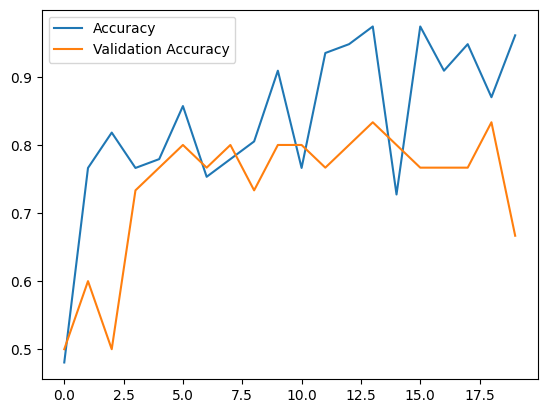

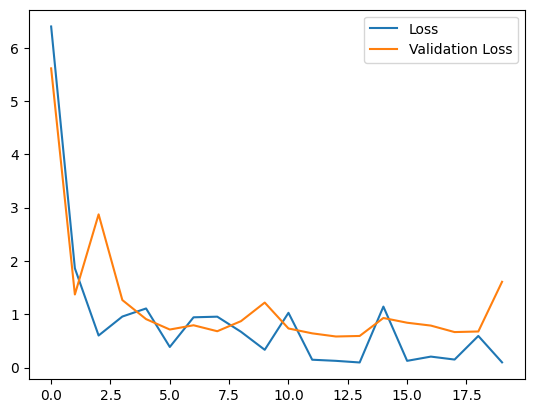

In [ ]:
acc = new_hist.history['acc']
val_acc = new_hist.history['val_acc']
loss = new_hist.history['loss']
val_loss = new_hist.history['val_loss']

plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()